In [1]:
#VERY IMP TO USE API THIS IS TO MAKE THE PATH TO KAGGLE,JSON FILE
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

The syntax of the command is incorrect.


'cp' is not recognized as an internal or external command,
operable program or batch file.
'chmod' is not recognized as an internal or external command,
operable program or batch file.


In [2]:
!kaggle datasets download -d kritikseth/fruit-and-vegetable-image-recognition

'kaggle' is not recognized as an internal or external command,
operable program or batch file.


In [3]:
#EXTRACTING THE DATA FROM THE ZIP FILE

from zipfile import ZipFile
file_name = "/content/fruit-and-vegetable-image-recognition.zip"
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print("Done")

FileNotFoundError: [Errno 2] No such file or directory: '/content/fruit-and-vegetable-image-recognition.zip'

In [ ]:
#IMPORTING THE DEPENDENCIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image


In [ ]:

data_train_path="/content/train"
data_test_path="/content/test"
data_val_path="/content/validation"

In [ ]:
#WE ARE GONNA FIX ALL THE IMAGES OF SAME SIZE
img_height=180
img_width=180

In [ ]:
#WE HATE THE DATA IN THE FORM OF FOLDERS WE NEED TO LOAD THESE DATA INTO ARRAYS
#WE ARE GONNA LOAD DATA FROM THE DISC
data_train=tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size=(img_height,img_width),  #(width, height)
    batch_size=32,
    validation_split=False,
)

Found 3115 files belonging to 36 classes.


In [ ]:
data_class=data_train.class_names #TO GET THE DIFFFRENT CLASSES


In [ ]:
#WE HATE THE DATA IN THE FORM OF FOLDERS WE NEED TO LOAD THESE DATA INTO ARRAYS
#WE ARE GONNA LOAD DATA FROM THE DISC
data_test=tf.keras.utils.image_dataset_from_directory(
    data_test_path,
    shuffle=False,   #IN VALIDATION AND TEST SHUFFLE IS FALSE
    image_size=(img_height,img_width),  #(width, height)
    batch_size=32,
    validation_split=False,
)
data_class=data_test.class_names #TO GET THE DIFFFRENT CLASSES

Found 359 files belonging to 36 classes.


In [ ]:
data_test.class_names

['apple',
 'banana',
 'beetroot',
 'bell pepper',
 'cabbage',
 'capsicum',
 'carrot',
 'cauliflower',
 'chilli pepper',
 'corn',
 'cucumber',
 'eggplant',
 'garlic',
 'ginger',
 'grapes',
 'jalepeno',
 'kiwi',
 'lemon',
 'lettuce',
 'mango',
 'onion',
 'orange',
 'paprika',
 'pear',
 'peas',
 'pineapple',
 'pomegranate',
 'potato',
 'raddish',
 'soy beans',
 'spinach',
 'sweetcorn',
 'sweetpotato',
 'tomato',
 'turnip',
 'watermelon']

In [ ]:
#WE HATE THE DATA IN THE FORM OF FOLDERS WE NEED TO LOAD THESE DATA INTO ARRAYS
#WE ARE GONNA LOAD DATA FROM THE DISC
data_val=tf.keras.utils.image_dataset_from_directory(
    data_val_path,
    shuffle=False,
    image_size=(img_height,img_width),  #(width, height)
    batch_size=32,
    validation_split=False,
)


Found 351 files belonging to 36 classes.


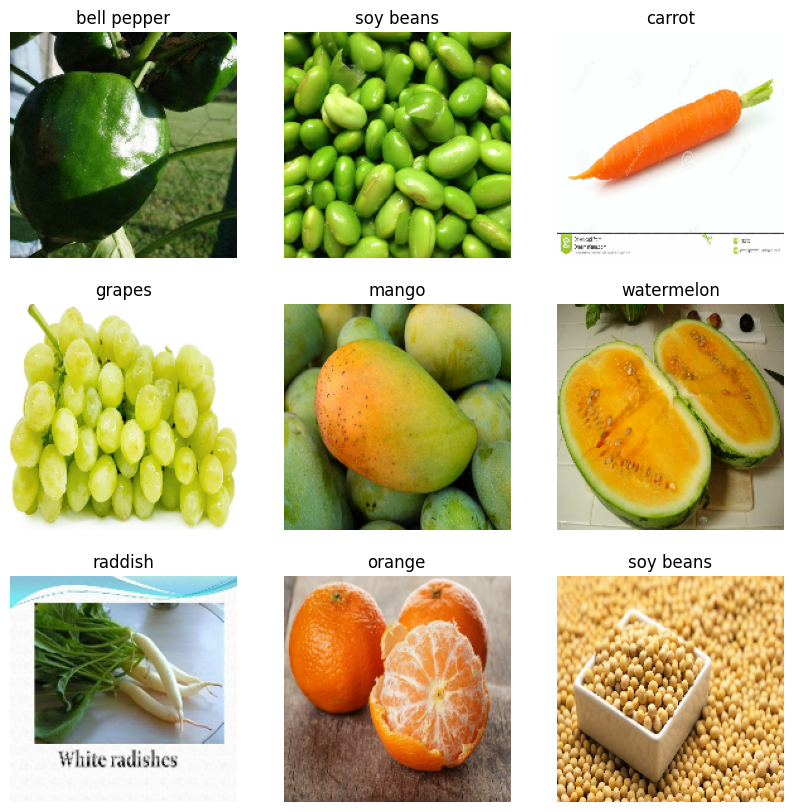

In [ ]:
#Getting some images
plt.figure(figsize=(10,10))
for images,labels in data_train.take(1):
  for i in range(9):
    ax=plt.subplot(3,3,i+1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(data_class[labels[i]])
    plt.axis("off")

In [ ]:
#NOW ITS TIME TO BUILD A MODEL
model=Sequential([
    layers.Rescaling(1./255,input_shape=(img_height,img_width,3)),
    layers.Conv2D(16,3,activation="relu",padding='same'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(32,3,activation="relu",padding='same'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64,3,activation="relu",padding='same'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128,activation="relu"),
    layers.Dense(64,activation="relu"),
    layers.Dense(units=len(data_class))
])



In [ ]:
model.compile(optimizer="adam",loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=["accuracy"])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 90, 90, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 45, 45, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

In [ ]:
model.fit(data_train,validation_data=data_val,epochs=15,batch_size=33,verbose=1)

Epoch 1/15
98/98 [==============================] - 13s 131ms/step - loss: 0.1566 - accuracy: 0.9592 - val_loss: 0.3157 - val_accuracy: 0.9430
Epoch 2/15
98/98 [==============================] - 13s 131ms/step - loss: 0.1101 - accuracy: 0.9721 - val_loss: 0.3533 - val_accuracy: 0.9430
Epoch 3/15
98/98 [==============================] - 14s 134ms/step - loss: 0.1117 - accuracy: 0.9685 - val_loss: 0.3750 - val_accuracy: 0.9430
Epoch 4/15
98/98 [==============================] - 13s 130ms/step - loss: 0.1471 - accuracy: 0.9557 - val_loss: 0.2716 - val_accuracy: 0.9459
Epoch 5/15
98/98 [==============================] - 13s 130ms/step - loss: 0.1049 - accuracy: 0.9708 - val_loss: 0.3400 - val_accuracy: 0.9516
Epoch 6/15
98/98 [==============================] - 13s 131ms/step - loss: 0.0784 - accuracy: 0.9807 - val_loss: 0.3809 - val_accuracy: 0.9516
Epoch 7/15
98/98 [==============================] - 13s 130ms/step - loss: 0.0784 - accuracy: 0.9788 - val_loss: 0.4206 - val_accuracy: 0.9402

Text(0.5, 1.0, 'Training and Validation Accuracy')

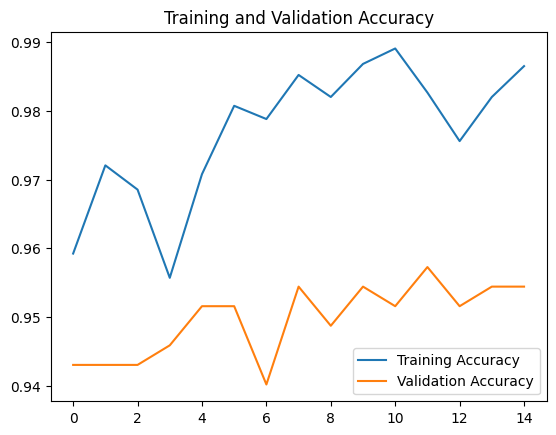

In [ ]:
epochs_range=range(15)
acc=model.history.history['accuracy']
val_acc=model.history.history['val_accuracy']
loss=model.history.history['loss']
val_loss=model.history.history['val_loss']
plt.plot(epochs_range,acc,label='Training Accuracy')
plt.plot(epochs_range,val_acc,label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

In [ ]:
image='/content/test/banana/Image_10.jpg'
image=tf.keras.utils.load_img(image,target_size=(img_height,img_width))
image_arr=tf.keras.utils.img_to_array(image) # Use img_to_array to convert PIL Image to NumPy array
img_batch=tf.expand_dims(image_arr,0)
result=model.predict(img_batch)
result

1/1 [==============================] - 0s 114ms/step


array([[ -2.6008878 ,  19.09812   , -14.366074  ,  -7.5488815 ,
         -6.838919  ,  -4.4068055 , -12.4278965 ,  13.694382  ,
        -15.296829  ,   6.2464724 , -11.704373  , -12.285037  ,
         -9.67666   ,  10.690705  ,  -4.4018693 , -10.803796  ,
          0.30569223,  13.031956  , -15.848695  ,   4.246649  ,
         -8.283402  ,   0.7260666 , -15.855545  ,  -1.913038  ,
         -8.157725  ,   1.1864948 , -21.154976  ,   0.24017185,
        -14.221393  ,  -2.690254  , -11.348536  ,   9.336685  ,
        -10.750083  ,  -9.7703085 ,  -3.2675564 , -10.25835   ]],
      dtype=float32)

In [ ]:
score=tf.nn.softmax(result)
score

<tf.Tensor: shape=(1, 36), dtype=float32, numpy=
array([[3.74254350e-10, 9.92946565e-01, 2.90810805e-15, 2.65631939e-12,
        5.40272948e-12, 6.14988130e-11, 2.01999824e-14, 4.46799072e-03,
        1.14653819e-15, 2.60331285e-06, 4.16459368e-14, 2.33020678e-14,
        3.16371658e-13, 2.21631853e-04, 6.18031321e-11, 1.02491664e-13,
        6.84665613e-09, 2.30369158e-03, 6.60262659e-16, 3.52382244e-07,
        1.27432873e-12, 1.04242446e-08, 6.55754538e-16, 7.44553474e-10,
        1.44498454e-12, 1.65198468e-08, 3.27512403e-18, 6.41243503e-09,
        3.36082514e-15, 3.42259332e-10, 5.94444741e-14, 5.72253848e-05,
        1.08147520e-13, 2.88089349e-13, 1.92147978e-10, 1.76836898e-13]],
      dtype=float32)>

In [ ]:
print('The given image is::',format(data_class[np.argmax(score)]))

The given image is:: banana


OSError: No file or directory found at Image_Classifier.keras